<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson5/GB_NN_intro_hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from keras.layers import SimpleRNN, LSTM, SimpleRNNCell, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D

import tensorflow as tf


<ol>
    <li>Попробуйте изменить параметры нейронной сети работающей с датасетом imdb либо нейронной сети работающей airline-passengers(она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить ее точность. Приложите анализ.</li>

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/GB_intro_NN/lesson5/airline-passengers.csv')

In [ ]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data.Month.unique()

array(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10', '1949-11', '1949-12',
       '1950-01', '1950-02', '1950-03', '1950-04', '1950-05', '1950-06',
       '1950-07', '1950-08', '1950-09', '1950-10', '1950-11', '1950-12',
       '1951-01', '1951-02', '1951-03', '1951-04', '1951-05', '1951-06',
       '1951-07', '1951-08', '1951-09', '1951-10', '1951-11', '1951-12',
       '1952-01', '1952-02', '1952-03', '1952-04', '1952-05', '1952-06',
       '1952-07', '1952-08', '1952-09', '1952-10', '1952-11', '1952-12',
       '1953-01', '1953-02', '1953-03', '1953-04', '1953-05', '1953-06',
       '1953-07', '1953-08', '1953-09', '1953-10', '1953-11', '1953-12',
       '1954-01', '1954-02', '1954-03', '1954-04', '1954-05', '1954-06',
       '1954-07', '1954-08', '1954-09', '1954-10', '1954-11', '1954-12',
       '1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06',
       '1955-07', '1955-08', '1955-09', '1955-10', 

In [ ]:
date_split = data['Month'].str.split("-", expand=True)
data.drop(columns='Month', inplace=True)
data['Year'] = date_split[0]
data['Month'] = date_split[1]
target = 'Passengers'
feat = ['Year','Month'] # список признаков, по которым будем учить
data.head()

,Passengers,Year,Month
0,112,1949,01
1,118,1949,02
2,132,1949,03
3,129,1949,04
4,121,1949,05


In [ ]:
scaler = StandardScaler()
data[feat] = scaler.fit_transform(data[feat])
data.head()

,Passengers,Year,Month
0,112,-1.593255,-1.593255
1,118,-1.593255,-1.303572
2,132,-1.593255,-1.013890
3,129,-1.593255,-0.724207
4,121,-1.593255,-0.434524


In [ ]:
train_size = 100

feat = ['Year','Month'] # список признаков, по которым будем учить

bias = 4 # отступ теста от тренировки

# разделение
train_data = data.iloc[:train_size][feat]
val_data = data.iloc[train_size + bias:][feat]

train_data.shape, val_data.shape

((100, 2), (40, 2))

In [ ]:
# train_data

In [ ]:
# val_data

Text(0.5, 1.0, 'Пассажиропоток')

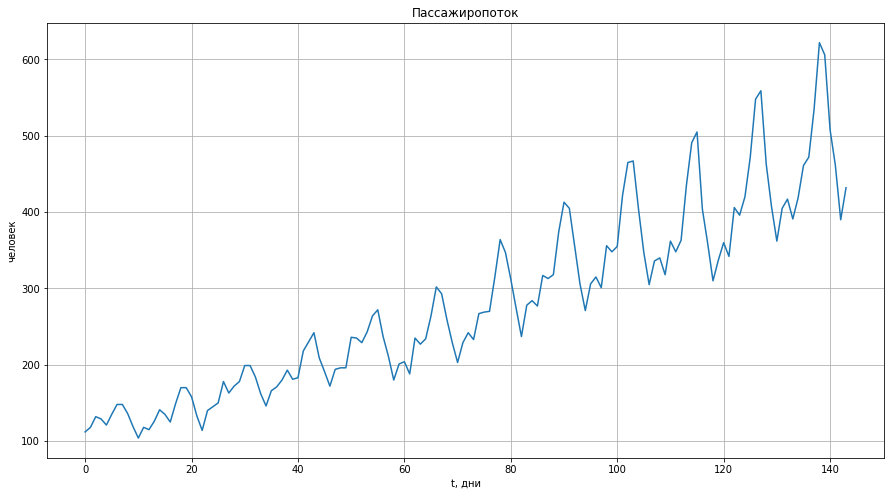

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(data[target], label='Исходный временной ряд')
plt.grid()
plt.xlabel('t, дни')
plt.ylabel('человек')
plt.title('Пассажиропоток')

Формируем параметры для генерации выборки

In [ ]:
# params 
# длина истории
x_len = 7

# горизонт предсказания
future = 1

# параметры модели для обучения
learning_rate = 0.001
batch_size = 10
epochs = 20

In [ ]:
start = x_len + future
end = start + train_size

print(f'Старт {start}, финиш {end}')

X_train = train_data[feat].values
y_train = data.iloc[start:end][target].values


x_end = len(val_data) - x_len - future
label_start = len(train_data) + bias + x_len + future
print(x_end, label_start)

X_val = val_data.iloc[:x_end][feat].values
y_val = data.iloc[label_start:][target].values

Старт 8, финиш 108
32 112


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((100, 2), (100,), (32, 2), (32,))

In [ ]:
# x_len

In [ ]:
# y_train.shape[0]

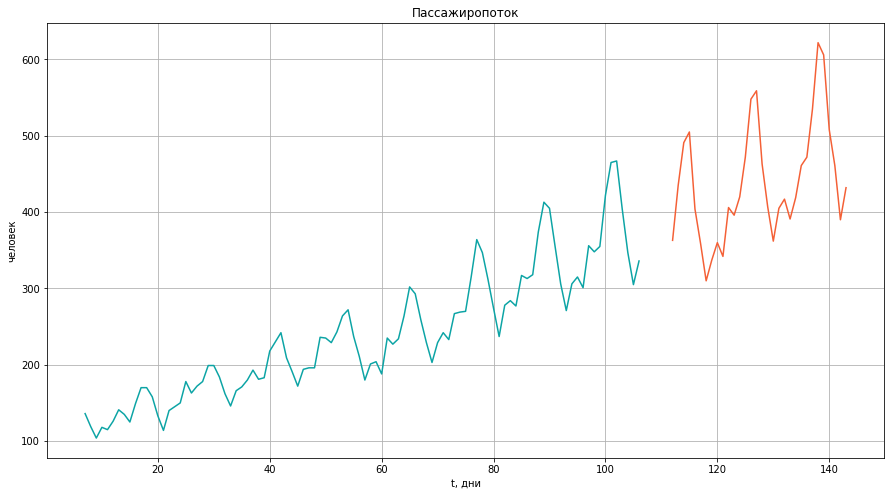

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(data.index[x_len:y_train.shape[0]+x_len],y_train[:], c='#0CA4A5')
plt.plot(data.index[y_train.shape[0]+x_len+bias+future:],y_val[:], c='#F46036')
plt.grid()
plt.xlabel('t, дни')
plt.ylabel('человек')
plt.title('Пассажиропоток')
plt.show()

In [ ]:
# Используем механизм формирования пакетов для обучения

dataset_train = timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

dataset_val = timeseries_dataset_from_array(
    X_val,
    y_val,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

In [ ]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    print("Input shape:", inputs.shape)
    print('\ninputs: \n',inputs[1])
    print("\nTarget shape:", targets.shape)
    print('\ntargets: \n',targets[1])

Input shape: (10, 7, 2)

inputs: 
 tf.Tensor(
[[-1.59325501 -1.30357228]
 [-1.59325501 -1.01388955]
 [-1.59325501 -0.72420682]
 [-1.59325501 -0.43452409]
 [-1.59325501 -0.14484136]
 [-1.59325501  0.14484136]
 [-1.59325501  0.43452409]], shape=(7, 2), dtype=float64)

Target shape: (10,)

targets: 
 tf.Tensor(119, shape=(), dtype=int64)


сеть: LSTM слои + Conv1D + Dense слой

In [ ]:
early_stop = EarlyStopping(monitor='val_mae', patience=5)

model1 = Sequential()

model1.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))
model1.add(Conv1D(64, 3, activation='linear'))
model1.add(Flatten())
model1.add(Dense(5, activation='linear'))
model1.add(Dense(1, activation='linear'))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 32)             4480      
                                                                 
 conv1d (Conv1D)             (None, 5, 64)             6208      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 5)                 1605      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 12,299
Trainable params: 12,299
Non-trainable params: 0
_________________________________________________________________


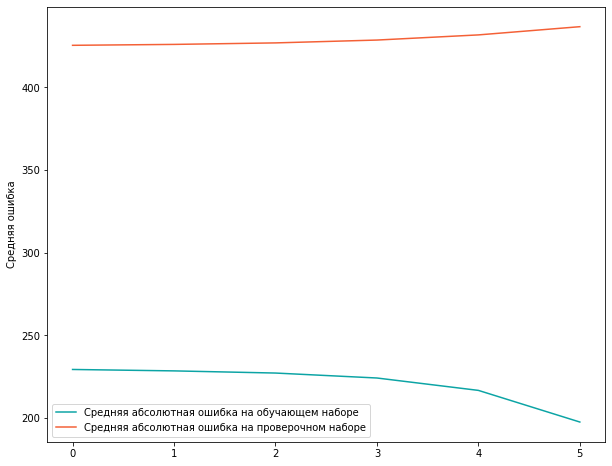

In [ ]:
history = model1.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop],
                    verbose=0)

plt.figure(figsize=(10, 8))

plt.plot(history.history['mae'][:], label='Средняя абсолютная ошибка на обучающем наборе', c='#0CA4A5')
plt.plot(history.history['val_mae'][:], label='Средняя абсолютная ошибка на проверочном наборе', c='#F46036')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
# еще один слой конволюции

early_stop = EarlyStopping(monitor='val_mae', patience=5)

model2 = Sequential()

model2.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))

model2.add(Conv1D(64, 5, activation='linear'))
model2.add(Conv1D(32, 3, activation='linear'))
model2.add(Flatten())
model2.add(Dense(5, activation='linear'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mse', optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 7, 32)             4480      
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             10304     
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 32)             6176      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21,131
Trainable params: 21,131
Non-trai

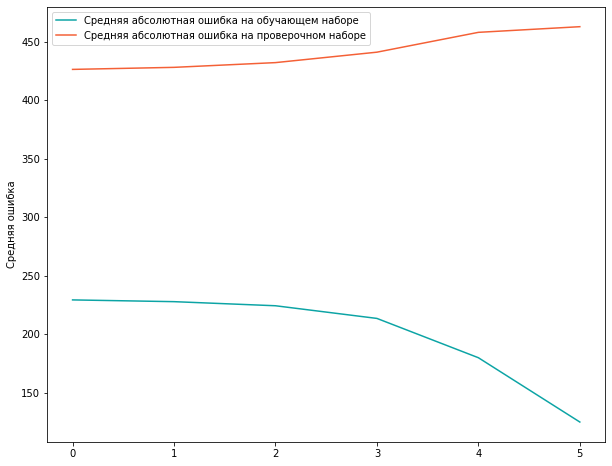

In [ ]:
history = model2.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop],
                    verbose=0)

plt.figure(figsize=(10, 8))

plt.plot(history.history['mae'][:], label='Средняя абсолютная ошибка на обучающем наборе', c='#0CA4A5')
plt.plot(history.history['val_mae'][:], label='Средняя абсолютная ошибка на проверочном наборе', c='#F46036')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
# еще один слой LSTM

early_stop = EarlyStopping(monitor='val_mae', patience=5)

model3 = Sequential()

model3.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))
model3.add(LSTM(32, return_sequences=True))
model3.add(Conv1D(64, 5, activation='linear'))
model3.add(Conv1D(32, 3, activation='linear'))
model3.add(Flatten())
model3.add(Dense(5, activation='linear'))
model3.add(Dense(1, activation='linear'))

model3.compile(loss='mse', optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 32)             4480      
                                                                 
 lstm_3 (LSTM)               (None, 7, 32)             8320      
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 64)             10304     
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 32)             6176      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
 dense_5 (Dense)             (None, 1)                

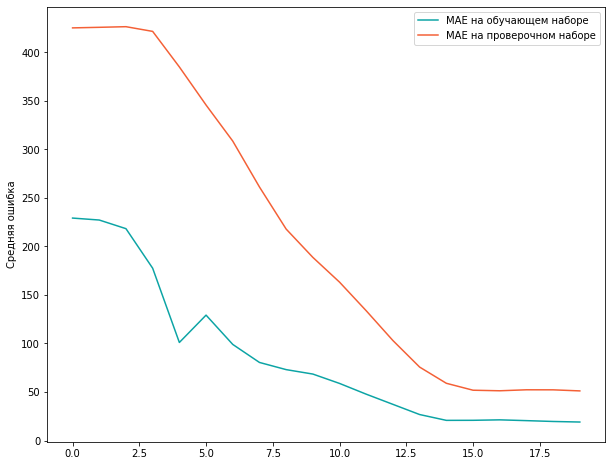

In [ ]:
history = model3.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop],
                    verbose=0)

plt.figure(figsize=(10, 8))

plt.plot(history.history['mae'][:], label='MAE на обучающем наборе', c='#0CA4A5')
plt.plot(history.history['val_mae'][:], label='MAE на проверочном наборе', c='#F46036')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
# увеличим число эпох
epochs = 50

early_stop = EarlyStopping(monitor='val_mae', patience=5)

model4 = Sequential()

model4.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))
model4.add(LSTM(32, return_sequences=True))
model4.add(Conv1D(64, 3, activation='linear'))
model4.add(Conv1D(64, 1, activation='linear'))
model4.add(Flatten())
model4.add(Dense(5, activation='linear'))
model4.add(Dense(1, activation='linear'))

model4.compile(loss='mse', optimizer='adam', metrics=['mae'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 32)             4480      
                                                                 
 lstm_5 (LSTM)               (None, 7, 32)             8320      
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 64)             6208      
                                                                 
 conv1d_6 (Conv1D)           (None, 5, 64)             4160      
                                                                 
 flatten_3 (Flatten)         (None, 320)               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 1605      
                                                                 
 dense_7 (Dense)             (None, 1)                

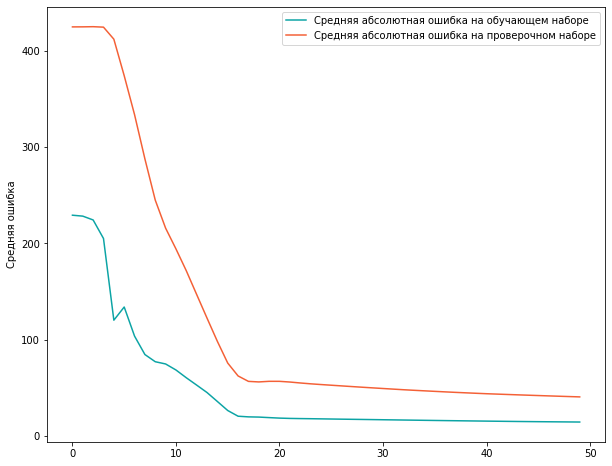

In [ ]:
history = model4.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop],
                    verbose=0)

plt.figure(figsize=(10, 8))

plt.plot(history.history['mae'][:], label='Средняя абсолютная ошибка на обучающем наборе', c='#0CA4A5')
plt.plot(history.history['val_mae'][:], label='Средняя абсолютная ошибка на проверочном наборе', c='#F46036')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
epochs = 50
# добавим ещё один слой conv
early_stop = EarlyStopping(monitor='val_mae', patience=5)

model5 = Sequential()

model5.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))
model5.add(LSTM(32, return_sequences=True))
model5.add(Conv1D(64, 5, activation='linear'))
model5.add(Conv1D(32, 3, activation='linear'))
model5.add(Conv1D(16, 1, activation='linear'))
model5.add(Flatten())
model5.add(Dense(5, activation='linear'))
model5.add(Dense(1, activation='linear'))

model5.compile(loss='mse', optimizer='adam', metrics=['mae'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 32)             4480      
                                                                 
 lstm_7 (LSTM)               (None, 7, 32)             8320      
                                                                 
 conv1d_7 (Conv1D)           (None, 3, 64)             10304     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 32)             6176      
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 16)             528       
                                                                 
 flatten_4 (Flatten)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 5)                

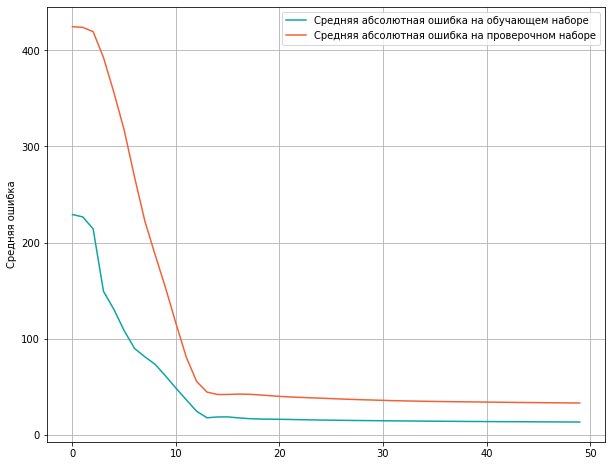

In [ ]:
history = model5.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop],
                    verbose=0)

plt.figure(figsize=(10, 8))

plt.plot(history.history['mae'][:], label='Средняя абсолютная ошибка на обучающем наборе', c='#0CA4A5')
plt.plot(history.history['val_mae'][:], label='Средняя абсолютная ошибка на проверочном наборе', c='#F46036')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pred = model5.predict(dataset_train).flatten()
pred_val = model5.predict(dataset_val).flatten()

3/3 [==============================] - 0s 8ms/step


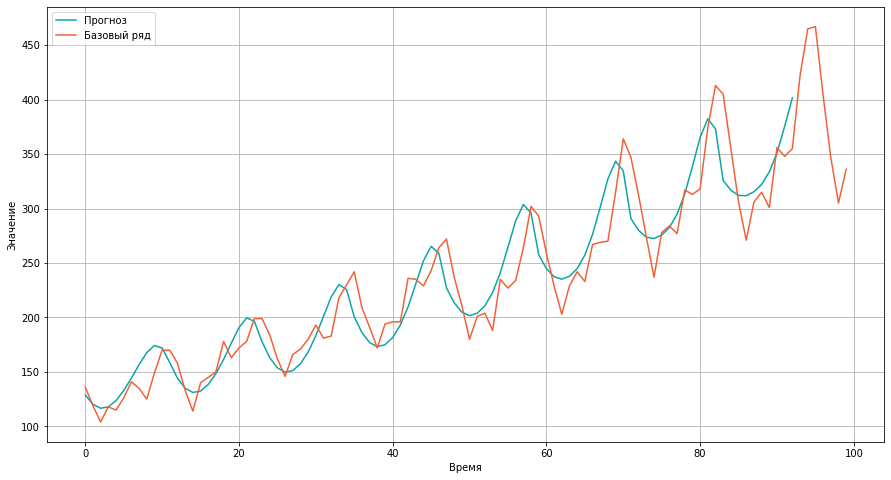

In [ ]:
start = 0

plt.figure(figsize=(15, 8))
plt.grid('on')
plt.plot(pred[future + start: future + train_size], label='Прогноз', c='#0CA4A5')
plt.plot(y_train.flatten()[start: train_size], label='Базовый ряд', c='#F46036')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()

plt.show()

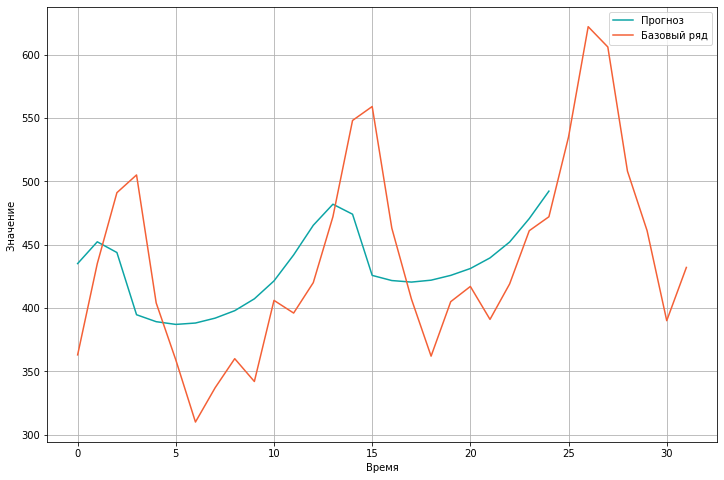

In [ ]:
start = 0
step = 50
plt.figure(figsize=(12, 8))
plt.grid('on')
plt.plot(pred_val[future + start: future + start + step], label='Прогноз', c='#0CA4A5')
plt.plot(y_val.flatten()[start: start+step], label='Базовый ряд', c='#F46036')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

<li>Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.</li>

In [8]:
import numpy as np
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, LSTM, SimpleRNNCell, Flatten, Dense, LSTM, GRU
from keras.models import Sequential


# построчное чтение из примера с текстом 
with open("alice_in_wonderland.txt", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)


# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID and a specific character. The numerical ID will correspond to a column
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 10, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1


# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 128, 128
NUM_ITERATIONS = 1 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 5
NUM_PREDS_PER_EPOCH = 150


# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. За ним последует полносвязный слой связанный с набором возможных
следующих символов, которые конвертированы в вероятностные результаты через стандартную softmax активацию с multi-class cross-encoding loss функцию ссылающуются на предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)

model.add(Flatten())
model.add(Dense(nb_chars, activation='linear'))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")


# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Итерация #: 0
Epoch 1/5
1241/1241 [==============================] - 31s 23ms/step - loss: 2.2771
Epoch 2/5
1241/1241 [==============================] - 28s 23ms/step - loss: 1.8890
Epoch 3/5
1241/1241 [==============================] - 28s 23ms/step - loss: 1.7382
Epoch 4/5
1241/1241 [==============================] - 30s 24ms/step - loss: 1.6324
Epoch 5/5
1241/1241 [==============================] - 28s 23ms/step - loss: 1.5540
Генерация из посева: ling! half
ling! half and she was a little she was a little she was a little she was a little she was a little she was a little she was a little she was a little she was a
